In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

KeyboardInterrupt: ignored

In [0]:
import torch
from sklearn.metrics.ranking import roc_auc_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import math
import sys
sys.path.append('/content/gdrive/My Drive/CSE6250BDH-PROJECT')
from config import DenseNet121

In [0]:
nnClassCount = 5

# Class names
class_names_14 = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 
               'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 
               'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']
class_names_5 = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']

if nnClassCount == 14:
    class_names = class_names_14
else:
    class_names = class_names_5

In [0]:

checkpoint = '/content/gdrive/My Drive/CSE6250BDH-PROJECT/models/GoogleNet_2019.11.15.000851'
modelCheckpoint = torch.load(checkpoint)
outGT1 = modelCheckpoint["labels"]
outPRED1 = modelCheckpoint["probs"]
checkpoint = '/content/gdrive/My Drive/CSE6250BDH-PROJECT/models/ResNet18_2019.11.16.094424'
modelCheckpoint = torch.load(checkpoint)
outGT2 = modelCheckpoint["labels"]
outPRED2 = modelCheckpoint["probs"]
checkpoint = '/content/gdrive/My Drive/CSE6250BDH-PROJECT/models/ResNet152_2019.11.15.222107'
modelCheckpoint = torch.load(checkpoint)
outGT3 = modelCheckpoint["labels"]
outPRED3 = modelCheckpoint["probs"]
checkpoint = '/content/gdrive/My Drive/CSE6250BDH-PROJECT/models/DenseNet121_2019.11.16.131915'
modelCheckpoint = torch.load(checkpoint)
outGT4 = modelCheckpoint["labels"]
outPRED4 = modelCheckpoint["probs"]

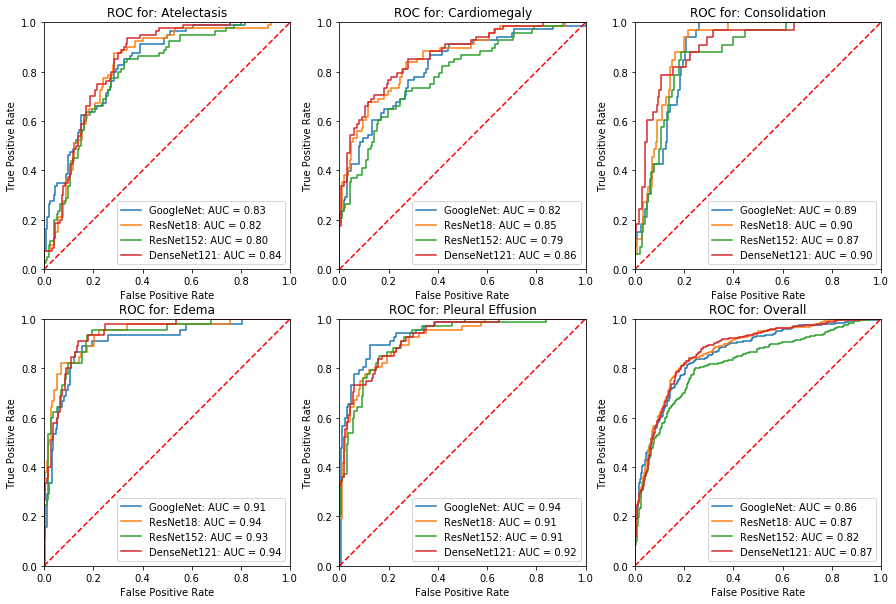

In [0]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

for i in range(nnClassCount):
    fpr1, tpr1, threshold = metrics.roc_curve(outGT1[:,i], outPRED1[:,i])
    roc_auc1 = metrics.auc(fpr1, tpr1)
    f = plt.subplot(2, math.ceil(nnClassCount/2), i+1)
    fpr2, tpr2, threshold2 = metrics.roc_curve(outGT2[:,i], outPRED2[:,i])
    roc_auc2 = metrics.auc(fpr2, tpr2)
    fpr3, tpr3, threshold3 = metrics.roc_curve(outGT3[:,i], outPRED3[:,i])
    roc_auc3 = metrics.auc(fpr3, tpr3)
    fpr4, tpr4, threshold4 = metrics.roc_curve(outGT4[:,i], outPRED4[:,i])
    roc_auc4 = metrics.auc(fpr4, tpr4)

    plt.title('ROC for: ' + class_names[i])
    plt.plot(fpr1, tpr1, label = 'GoogleNet: AUC = %0.2f' % roc_auc1)
    plt.plot(fpr2, tpr2, label = 'ResNet18: AUC = %0.2f' % roc_auc2)
    plt.plot(fpr3, tpr3, label = 'ResNet152: AUC = %0.2f' % roc_auc3)
    plt.plot(fpr4, tpr4, label = 'DenseNet121: AUC = %0.2f' % roc_auc4)

    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

fpr1, tpr1, threshold = metrics.roc_curve(outGT1.flatten(), outPRED1.flatten())
roc_auc1 = metrics.auc(fpr1, tpr1)
f = plt.subplot(2, math.ceil(nnClassCount/2), i+2)
fpr2, tpr2, threshold2 = metrics.roc_curve(outGT2.flatten(), outPRED2.flatten())
roc_auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = metrics.roc_curve(outGT3.flatten(), outPRED3.flatten())
roc_auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = metrics.roc_curve(outGT4.flatten(), outPRED4.flatten())
roc_auc4 = metrics.auc(fpr4, tpr4)

plt.title('ROC for: Overall')
plt.plot(fpr1, tpr1, label = 'GoogleNet: AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, label = 'ResNet18: AUC = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, label = 'ResNet152: AUC = %0.2f' % roc_auc3)
plt.plot(fpr4, tpr4, label = 'DenseNet121: AUC = %0.2f' % roc_auc4)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#plt.savefig("ROC1345.png", dpi=1000)
plt.show()